In [14]:
## Convert Timestamp to python format

import pandas as pd

ratings = pd.read_csv('./movielens/ratings.csv')

movies = pd.read_csv('./movielens/movies.csv')

tags = pd.read_csv('./movielens/tags.csv')

tags.dtypes


userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [15]:
tags['parsed_times'] = pd.to_datetime(tags['timestamp'], unit = 's')

tags

,userId,movieId,tag,timestamp,parsed_times
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20
...,...,...,...,...,...
3678,606,7382,for katie,1171234019,2007-02-11 22:46:59
3679,606,7936,austere,1173392334,2007-03-08 22:18:54
3680,610,3265,gun fu,1493843984,2017-05-03 20:39:44
3681,610,3265,heroic bloodshed,1493843978,2017-05-03 20:39:38


In [16]:
# we can create filters using parsetime

greater_than_t = tags['parsed_times'] > '2015-10-19'

selected_rows = tags[greater_than_t]

selected_rows

,userId,movieId,tag,timestamp,parsed_times
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20
...,...,...,...,...,...
3670,599,2959,violence,1498456904,2017-06-26 06:01:44
3671,599,2959,violent,1498456914,2017-06-26 06:01:54
3680,610,3265,gun fu,1493843984,2017-05-03 20:39:44
3681,610,3265,heroic bloodshed,1493843978,2017-05-03 20:39:38


In [20]:
# We can sort table in chronological order using ascending/ descending comand

print('Sorting by movieId\n',tags.sort_values(by = 'movieId').head())  # Default is ascending

print('\n\nSorting by parsed_time\n',tags.sort_values(by = 'parsed_times', ascending = True).tail())  # Default is ascending

Sorting by movieId
       userId  movieId               tag   timestamp        parsed_times
2886     567        1               fun  1525286013 2018-05-02 18:33:33
981      474        1             pixar  1137206825 2006-01-14 02:47:05
629      336        1             pixar  1139045764 2006-02-04 09:36:04
35        62        2    Robin Williams  1528843907 2018-06-12 22:51:47
34        62        2  magic board game  1528843932 2018-06-12 22:52:12


Sorting by parsed_time
      userId  movieId       tag   timestamp        parsed_times
517     184     5388  insomnia  1537094688 2018-09-16 10:44:48
527     184   193565     anime  1537098582 2018-09-16 11:49:42
528     184   193565    comedy  1537098587 2018-09-16 11:49:47
530     184   193565  remaster  1537098592 2018-09-16 11:49:52
529     184   193565   gintama  1537098603 2018-09-16 11:50:03


# Average movie ratings over time
### Are the movie ratings related to the year of launch?

In [32]:
#First make a year column

movies['year'] = movies['title'].str.extract('.*\((.*)\).*')

avg_rating = ratings[['movieId','rating']].groupby('movieId', as_index =True).mean()

avg_rating

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [6]:
joined = movies.merge(avg_rating, on = 'movieId', how = 'inner')

joined

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,3.500000
9721,193585,Flint (2017),Drama,2017,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,3.500000


In [12]:
avg_year_rating = joined[['year','rating']].groupby('year',as_index = False).mean()

avg_year_rating

,year,rating
0,1902,3.500000
1,1903,2.500000
2,1908,4.000000
3,1915,2.000000
4,1916,3.562500
...,...,...
102,2014,3.113464
103,2015,3.069094
104,2016,3.103748
105,2017,3.376749


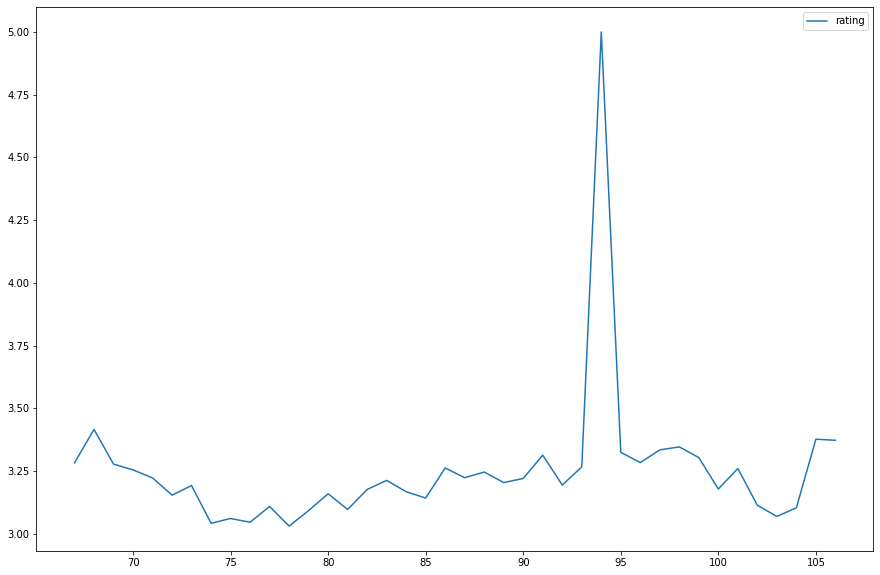

In [13]:
%matplotlib inline

avg_year_rating[-40:].plot(figsize = (15,10))

Here we can see that one year is perticularly good. From this analysis we may say that movie rating is related to year of lounch

In [34]:
df = pd.DataFrame(data={'books':['bk1','bk1','bk1','bk2','bk2','bk3'], 'price': [12,12,12,15,15,17]})

print(df)



  books  price
0   bk1     12
1   bk1     12
2   bk1     12
3   bk2     15
4   bk2     15
5   bk3     17


In [35]:
print(df.groupby('books', as_index=True).sum())



       price
books       
bk1       36
bk2       30
bk3       17


In [36]:
print(df.groupby('books', as_index=False).sum())

  books  price
0   bk1     36
1   bk2     30
2   bk3     17
